Among patients who have treatment tr1, we are interested in comparing the differences in cell population relative frequencies of melanoma patients who respond (responders) to tr1 versus those who do not (non-responders), with the overarching aim of predicting response to treatment tr1. Response information can be found in column response, with value y for responding and value n for non-responding. Please only include PBMC (blood) samples. 
For each immune cell population, please generate a boxplot of the population relative frequencies comparing responders versus non-responders.
Which cell populations show a difference between responders and non-responders? Please include statistics to support your conclusion.

/Users/leeleavitt/Documents/110523_teiko_tech_screen/teiko_tools/analysis.py:124: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax = sns.stripplot(
/Users/leeleavitt/Documents/110523_teiko_tech_screen/teiko_tools/analysis.py:137: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


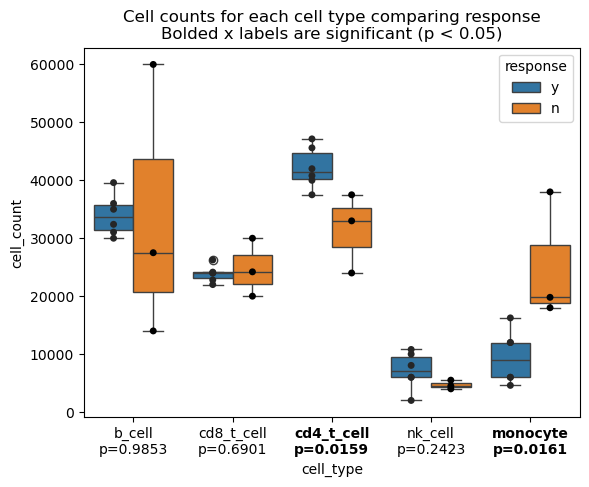

In [1]:
from teiko_tools.analysis import CellCountsBoxPlot

ccbp = CellCountsBoxPlot(file_name="cell-count.csv", file_name_out = None)

ccbp.cell_type_treatment_box_plot()

/Users/leeleavitt/Documents/110523_teiko_tech_screen/teiko_tools/analysis.py:124: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax = sns.stripplot(
/Users/leeleavitt/Documents/110523_teiko_tech_screen/teiko_tools/analysis.py:137: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


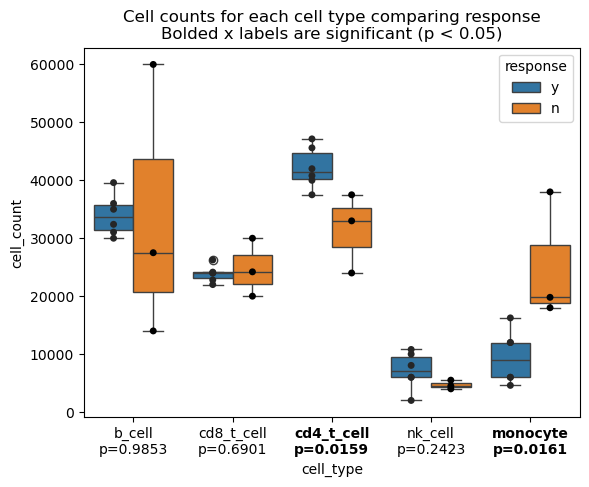

In [2]:
from teiko_tools.analysis import CellCountsBoxPlot

ccbp = CellCountsBoxPlot(file_name="cell-count.csv", file_name_out = "treatment_comparison.png")

ccbp.cell_type_treatment_box_plot()

# Proof of Concept

In [49]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# load the data
cell_df = pd.read_csv("cell-count.csv")

# create a mask for the treatment column
treatment_mask = cell_df["treatment"] == "tr1" 
condition_mask = cell_df["condition"] == "melanoma"
sample_type_mask = cell_df["sample_type"] == "PBMC"

# create a new dataframe with the filtered data
cell_ss_df = cell_df[treatment_mask & condition_mask & sample_type_mask]
# drop the columns that are not needed
cell_ss_df = cell_ss_df[['response', 'b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte']]
cell_ss_df


,response,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
0,y,36000,24000,42000,6000,12000
1,y,30000,22000,40000,2000,6000
2,y,35000,26250,37500,10000,16250
4,n,60000,30000,37500,4500,18000
5,n,27500,24200,33000,5500,19800
11,y,39600,22800,45600,6000,6000
12,y,31050,24150,47150,8050,4600
15,n,14000,20000,24000,4000,38000
16,y,32400,24000,40800,10800,12000


In [12]:
# we are going to use the melt function to transform the data
cell_ss_df_melt = cell_ss_df.melt(id_vars=['response'], var_name='cell_type', value_name='cell_count')
cell_ss_df_melt.head()

,response,cell_type,cell_count
0,y,b_cell,36000
1,y,b_cell,30000
2,y,b_cell,35000
3,n,b_cell,60000
4,n,b_cell,27500


In [31]:
# now lets go with statistics to provide a p-value
# we will use a t-test

# collect all the cell types
cell_types_unique = cell_ss_df_melt.cell_type.unique()

# group the data by response and cell type
grouped_data = cell_ss_df_melt.groupby(['response', 'cell_type'])


def cell_type_t_tester(cell_type_to_calc: str = 'b_cell'):
    """Function to calculate the t-test for a given cell type.
    Args:
        cell_type_to_calc (str, optional): Name of the cell type to calculate the t-test for. Defaults to 'b_cell'.
    Returns:
        p_val (float): p-value from the t-test"""
    b_cell_group_n = grouped_data.get_group(('n', cell_type_to_calc))['cell_count']
    b_cell_group_y = grouped_data.get_group(('y', cell_type_to_calc))["cell_count"]

    t_stat, p_val = stats.ttest_ind(b_cell_group_n, b_cell_group_y)
    p_val = np.round(p_val, 4)
    return p_val


array(['b_cell', 'cd8_t_cell', 'cd4_t_cell', 'nk_cell', 'monocyte'],
      dtype=object)

In [59]:
# now generate the p value for each cell type
x_labels = [] 
p_vals = []
weights = []
for cell_type in cell_types_unique:
    p_val = cell_type_t_tester(cell_type)
    x_labels.append(f"{cell_type}\np={p_val}")
    p_vals.append(p_val)

    if p_val < 0.05:
        weights.append('bold')
    else:
        weights.append('normal')

        

/var/folders/3j/9y3p58kn7s117_3j6x9hpngw0000gq/T/ipykernel_7513/622704706.py:13: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  ax = sns.stripplot(
/var/folders/3j/9y3p58kn7s117_3j6x9hpngw0000gq/T/ipykernel_7513/622704706.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels)


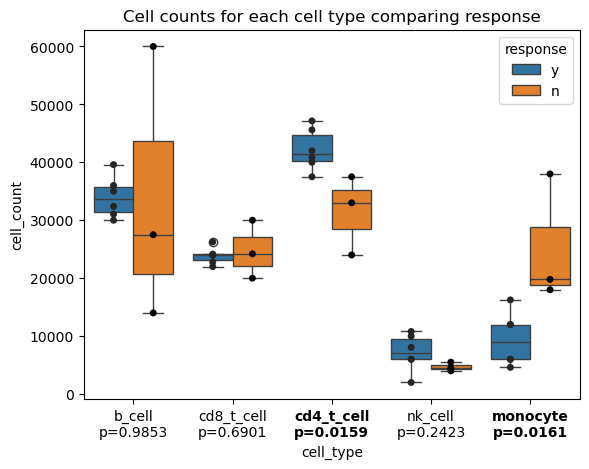

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt


# using seaborn to plot the data
ax = sns.boxplot(
    x="cell_type", 
    y="cell_count", 
    hue="response", 
    data=cell_ss_df_melt)

# adding the stripplot to show the datapoints
ax = sns.stripplot(
    ax=ax,
    x='cell_type', 
    y='cell_count', 
    hue="response", 
    data=cell_ss_df_melt, 
    dodge=True, 
    jitter=False, 
    color = "black",
    legend=False
)

# adding the legend and the x labels
ax.set_xticklabels(x_labels)

# i want the significant p values to be bolded
for label, weight in zip(ax.get_xticklabels(), weights):
    label.set_fontweight(weight)

# update the title
plt.title("Cell counts for each cell type comparing response")
plt.show()

In [63]:
from teiko_tools.analysis import CellCountsBoxPlot

ccbp = CellCountsBoxPlot(file_name="cell-count.csv", file_name_out = None)

ccbp.cell_type_treatment_box_plot()

ImportError: cannot import name 'CellCountsBoxPlot' from 'teiko_tools.analysis' (/Users/leeleavitt/Documents/110523_teiko_tech_screen/teiko_tools/analysis.py)